In [1]:
pip install colorama

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


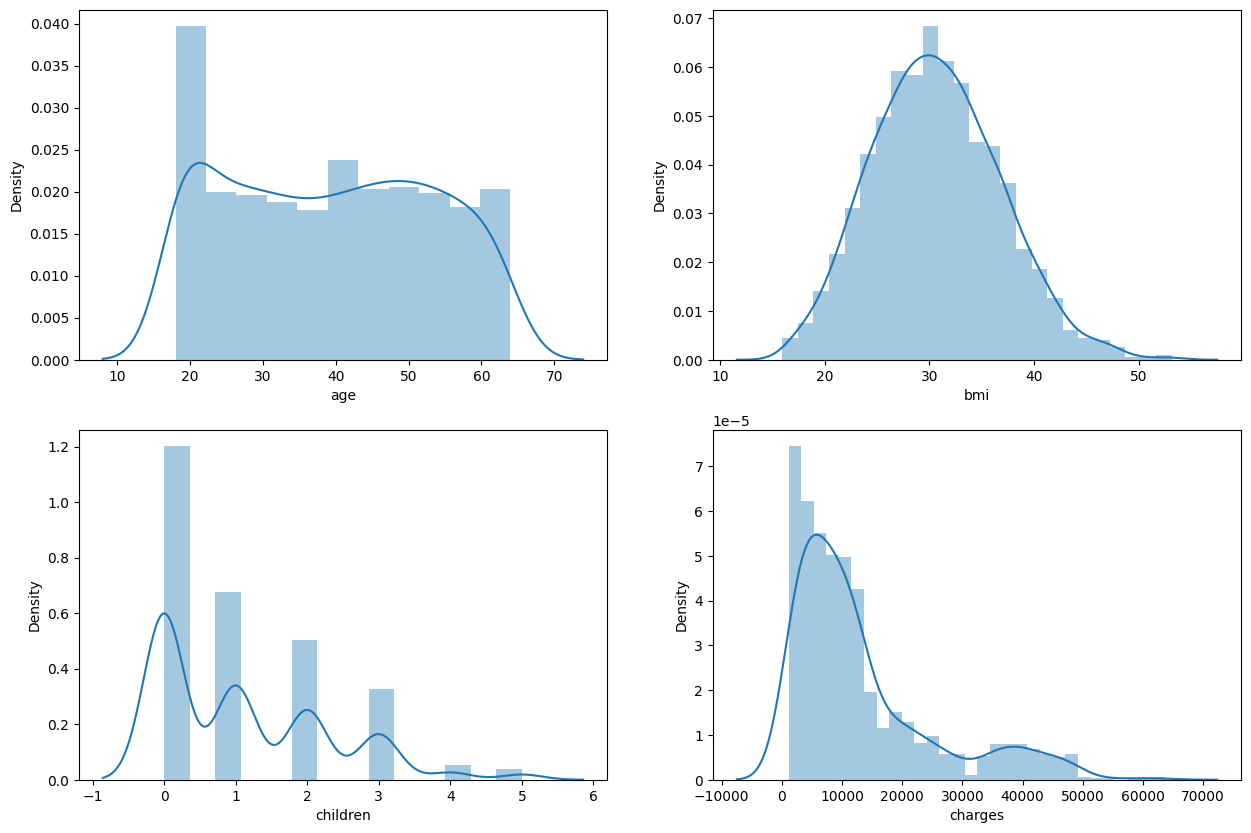

In [8]:

num_cols=["age","bmi","children","charges"]

plt.figure(figsize=(15,10))
for i,j in enumerate(num_cols):
  plt.subplot(2,2,i+1)
  sns.distplot(data[j])

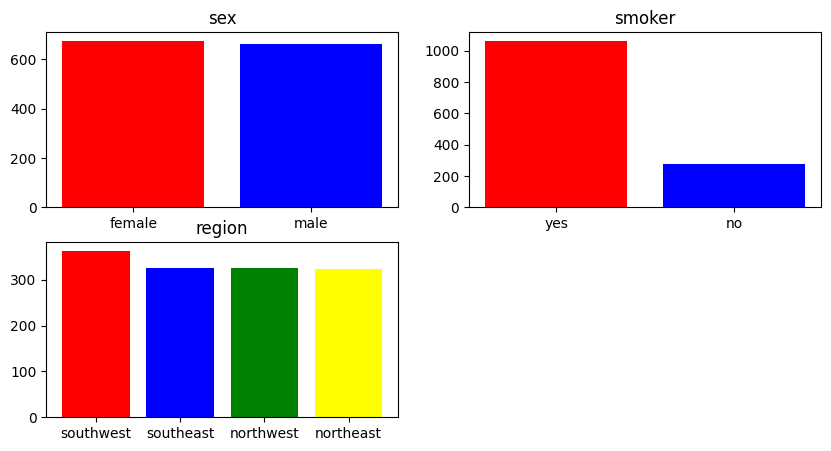

In [9]:
cat_cols=["sex", "smoker", "region"]

plt.figure(figsize=(10,5))
for i,j in enumerate(cat_cols):
  plt.subplot(2,2,i+1)
  plt.title(j)
  plt.bar(data[j].unique(), data[j].value_counts(), color=["red","blue", "green","yellow"])

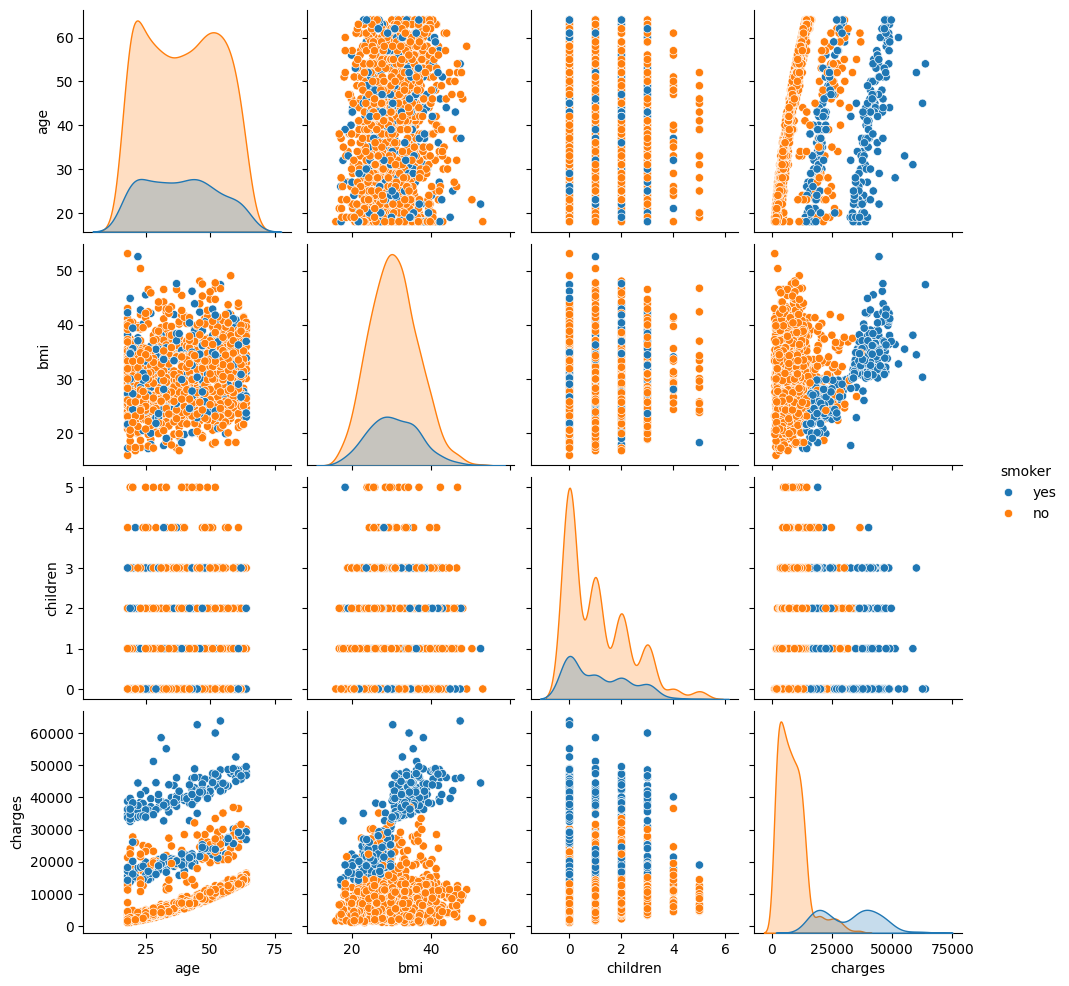

In [10]:
sns.pairplot(data, hue="smoker")

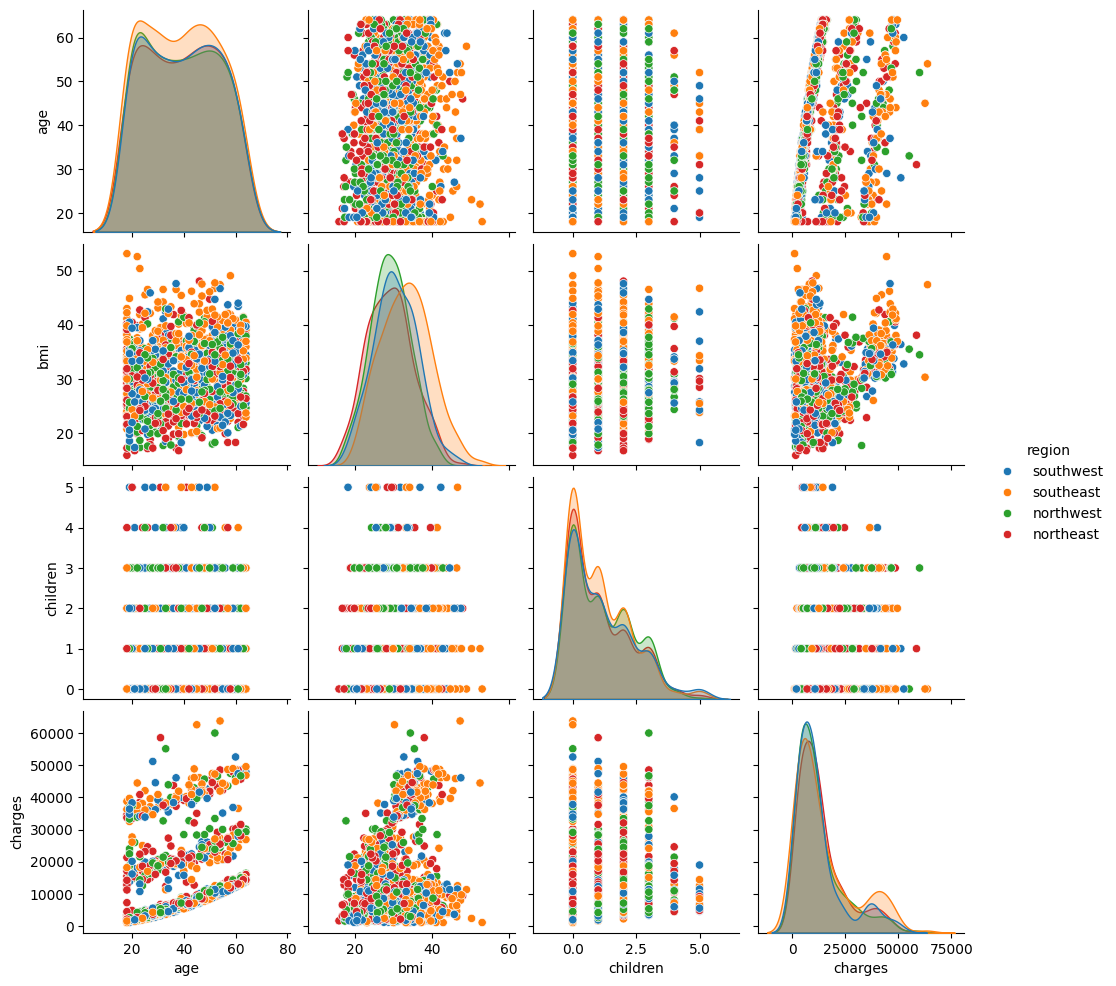

In [11]:
sns.pairplot(data, hue="region")

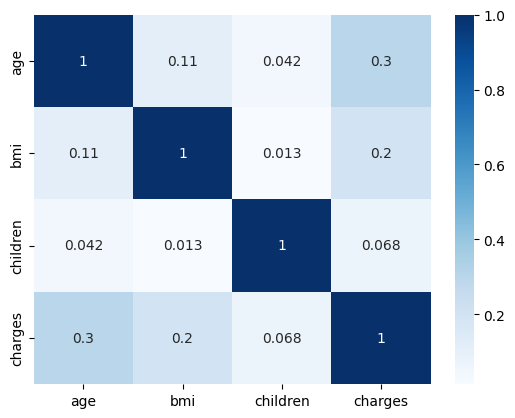

In [12]:
corrmatrix=data[num_cols].corr()
sns.heatmap(corrmatrix,cmap="Blues", annot=True)
plt.show()

In [13]:
data.sex = data.sex.astype("category")
data.sex = data.sex.cat.codes+1

data.smoker = data.smoker.astype("category")
data.smoker = data.smoker.cat.codes+1

data.region = data.region.astype("category")
data.region = data.region.cat.codes+1

In [14]:
scale=["age", "bmi", "children"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data[scale]=scaler.fit_transform(data[scale])

In [15]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1.338000e+03,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000
mean,-1.805565e-16,1.505232,-2.124194e-16,-5.576008e-17,1.204783,2.515695,13270.422265
std,1.000374e+00,0.500160,1.000374e+00,1.000374e+00,0.403694,1.104885,12110.011237
min,-1.509965e+00,1.000000,-2.412011e+00,-9.086137e-01,1.000000,1.000000,1121.873900
25%,-8.691547e-01,1.000000,-7.164063e-01,-9.086137e-01,1.000000,2.000000,4740.287150
50%,-1.474046e-02,2.000000,-4.320880e-02,-7.876719e-02,1.000000,3.000000,9382.033000
75%,8.396738e-01,2.000000,6.611572e-01,7.510793e-01,1.000000,3.000000,16639.912515
max,1.765289e+00,2.000000,3.685522e+00,3.240619e+00,2.000000,4.000000,63770.428010


In [16]:
x=data.drop("charges",axis=1)
y=data.charges

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8, random_state=100)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
print(lr.intercept_)
print(lr.coef_)

-15127.687681387613
[ 3294.68347247   153.54870411  2117.32573418    59.03680638
 24190.97769811  -740.37568613]


In [20]:
y_pred=lr.predict(x_test)

Text(0.5, 0, 'Index')

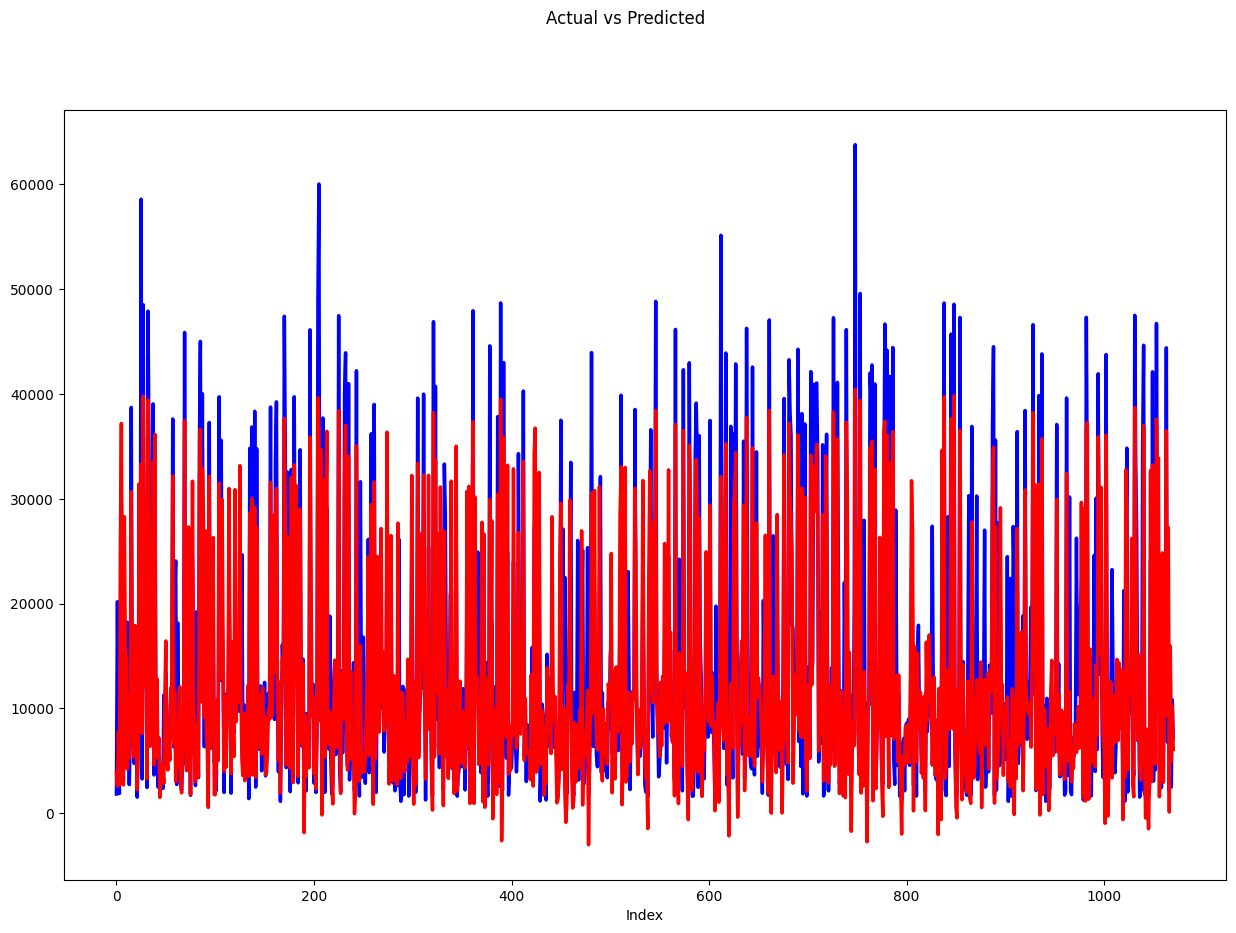

In [21]:
plt.figure(figsize=(15,10))

c=[i for i in range(len(x_test.index))]

plt.plot(c,y_test,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth=2.5,linestyle="-")
plt.suptitle("Actual vs Predicted")
plt.xlabel("Index")

In [22]:
pred_values = pd.DataFrame({"y_pred": y_pred, "y_test": y_test})
print(pred_values)

            y_pred       y_test
12     3851.167032   1826.84300
306    2571.912587  20177.67113
318    7758.410804   7421.19455
815    2713.071198   1877.92940
157   25886.173961  15518.18025
...            ...          ...
899     111.944563   2117.33885
895   15946.284699  13063.88300
470    4928.993670   2497.03830
1213  10216.508295  10806.83900
633    6096.138767   7173.35995

[1071 rows x 2 columns]


In [23]:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_sq_error:", mse)
print("r2:",r2score)

mean_sq_error: 40133676.84350258
r2: 0.7313828488041293


In [28]:
vif=pd.DataFrame()
vif["Features"]=data.columns
vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=True)
print(vif)

   Features    VIF
3  children   1.01
2       bmi   1.15
0       age   1.28
5    region   5.33
6   charges   7.11
1       sex   7.43
4    smoker  20.25


In [29]:
data.values

array([[-1.43876426e+00,  1.00000000e+00, -4.53320001e-01, ...,
         2.00000000e+00,  4.00000000e+00,  1.68849240e+04],
       [-1.50996545e+00,  2.00000000e+00,  5.09621097e-01, ...,
         1.00000000e+00,  3.00000000e+00,  1.72555230e+03],
       [-7.97953548e-01,  2.00000000e+00,  3.83306847e-01, ...,
         1.00000000e+00,  3.00000000e+00,  4.44946200e+03],
       ...,
       [-1.50996545e+00,  1.00000000e+00,  1.01487810e+00, ...,
         1.00000000e+00,  3.00000000e+00,  1.62983350e+03],
       [-1.29636188e+00,  1.00000000e+00, -7.97813410e-01, ...,
         1.00000000e+00,  4.00000000e+00,  2.00794500e+03],
       [ 1.55168573e+00,  1.00000000e+00, -2.61387960e-01, ...,
         2.00000000e+00,  2.00000000e+00,  2.91413603e+04]])

In [34]:
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=True)
print(vif)

   Features   VIF
3  children  1.01
0       age  1.03
2       bmi  1.07
5    region  5.72
1       sex  6.25
4    smoker  6.85
